In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
from ipywidgets import interact
from hdx.location.country import Country

# https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset?select=Food_Supply_kcal_Data.csv
# https://github.com/jupyter-widgets/ipywidgets/blob/e0d41f6f02324596a282bc9e4650fd7ba63c0004/docs/source/examples/Using%20Interact.ipynb

'''
About this file
This dataset includes percentage of energy intake (kcal)
from different types of food in countries around the world.
The last couple of columns also includes counts of obesity, undernourished,
and COVID-19 cases as percentages of the total population for comparison purposes.
'''
data = pd.read_csv('./data/Food_Supply_kcal_Data.csv')

data.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,2.3012,0.7504,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,2.8244,2.7508,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,5.7638,2.0457,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,4.2741,0.3525,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,...,4.6904,1.2960,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [83]:
data.describe()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,167.000000,164.000000,164.000000,164.000000,162.000000,1.700000e+02
mean,1.325197,9.294553,1.267419,0.002786,20.365358,0.428504,0.631501,2.011975,3.896367,2.924466,...,0.261619,40.707045,4.872421,1.086328,18.707784,2.021972,0.039370,1.452356,0.535158,4.452364e+07
std,1.062362,4.754174,1.283723,0.030879,6.467936,0.304333,0.579007,1.416149,2.216693,2.019384,...,0.285631,4.754308,2.164249,0.648232,9.633557,2.360454,0.048718,1.927617,1.329249,1.564182e+08
min,0.000000,1.623700,0.000000,0.000000,8.956500,0.018800,0.000000,0.147100,0.298000,0.116900,...,0.000000,27.708900,0.932500,0.095700,2.100000,0.000312,0.000000,0.000000,0.000000,5.400000e+04
25%,0.361300,5.082600,0.342850,0.000000,15.306175,0.141000,0.240150,1.224525,2.080700,1.107775,...,0.046625,36.830725,3.126350,0.602600,8.500000,0.140976,0.002013,0.099107,0.012028,2.816250e+06
50%,1.244600,9.034100,0.877500,0.000000,19.619950,0.403750,0.478300,1.694850,3.687450,2.719800,...,0.174000,40.969700,4.660650,1.003100,21.200000,1.011570,0.011998,0.475402,0.081040,1.018150e+07
75%,2.028050,13.174975,1.763175,0.000000,24.841450,0.632950,0.869675,2.370700,5.278325,4.319625,...,0.389575,44.940900,6.427900,1.366950,25.700000,3.487069,0.069503,2.622874,0.358183,3.271625e+07
max,5.157400,22.291100,7.800700,0.400700,37.526500,1.446100,4.418300,8.854000,10.567400,9.944100,...,1.421000,48.386400,10.383900,3.352400,45.600000,10.408199,0.185428,9.039871,8.019819,1.402385e+09


# Uzupełnianie brakujących danych i formatowanie danych

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal Products               170 non-null    float64
 3   Animal fats                   170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Milk - Excluding Butter       170 non-null    float64
 11  Miscellaneous                 170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

In [85]:
data['Undernourished'].values

array(['29.8', '6.2', '3.9', '25', nan, '4.6', '4.3', '<2.5', '<2.5',
       '<2.5', nan, '14.7', '3.9', '<2.5', '<2.5', '7.5', '10.1', '17.1',
       '<2.5', '26.4', '<2.5', '3.6', '20', '12.6', '16.4', '9.9', '<2.5',
       '59.6', '37.5', '2.7', '8.5', '4.8', '40.3', '4.8', '19', '<2.5',
       '<2.5', '5.6', '<2.5', '<2.5', '18.9', '6.2', '9.5', '7.9', '4.5',
       '9', '2.9', '20.6', '20.6', '3.7', '<2.5', '<2.5', '4.2', '10.5',
       '10.2', '7.9', '<2.5', '5.5', '<2.5', nan, '15.2', '16.5', '28',
       '8.1', '49.3', '12.9', '<2.5', '<2.5', '14.5', '8.3', '4.9', '29',
       '<2.5', '<2.5', '<2.5', '8', '<2.5', '12.2', '<2.5', '29.4', '2.7',
       '47.8', '<2.5', '2.8', '7.1', '16.5', '<2.5', '11', '13.1', '37.2',
       '<2.5', '<2.5', '44.4', '17.5', '2.5', '10.3', '6.3', '<2.5',
       '10.4', '6.5', '3.6', '13.4', '<2.5', '3.4', '27.9', '10.6',
       '27.3', '8.7', '<2.5', '7.1', '<2.5', '17', '16.5', '13.4', '3.2',
       '<2.5', '6.8', '20.3', '10', '10.7', '9.7', '13

In [86]:
def estimate_percentage_range(str_num_or_na):
    if type(str_num_or_na) == float and np.isnan(str_num_or_na):
        return str_num_or_na
    
    if type(str_num_or_na) == float:
        return str_num_or_na
    
    if str_num_or_na.startswith('<'):
        upper_range = str_num_or_na.replace('<', '')
        return float(upper_range) / 2
    
    if str_num_or_na.startswith('>'):
        upper_range = str_num_or_na.replace('>', '')
        return (float(upper_range) + 100) / 2
    
    return float(str_num_or_na)


# fix string values
data['Undernourished'] = data['Undernourished'].apply(estimate_percentage_range)

In [87]:
# drop meaningless column (all `%`)
data = data.drop('Unit (all except Population)', 1)
data = data.drop('Active', 1)

In [88]:
# display rows and columns with missing values
columns_with_missing_values = data.isnull().values.any(axis=0)
rows_with_missing_values = data.isnull().values.any(axis=1)
columns_with_missing_values = pd.Index(['Country']).append(data.columns[columns_with_missing_values])

data[rows_with_missing_values][columns_with_missing_values]

,Country,Obesity,Undernourished,Confirmed,Deaths,Recovered
4,Antigua and Barbuda,19.1,NaN,0.293878,0.007143,0.190816
10,Bahamas,32.1,NaN,2.100763,0.044784,1.735115
52,French Polynesia,NaN,4.2,NaN,NaN,NaN
59,Grenada,20.2,NaN,0.130973,0.000885,0.129204
80,Kiribati,45.6,2.7,NaN,NaN,NaN
81,"Korea, North",7.1,47.8,NaN,NaN,NaN
105,Myanmar,5.7,10.6,NaN,NaN,NaN
109,New Caledonia,NaN,7.1,NaN,NaN,NaN
124,Republic of Moldova,20.1,NaN,4.646195,0.099859,4.333692
128,Saint Kitts and Nevis,23.1,NaN,0.074074,0.000000,0.066667


In [89]:
# drop counties with missing fields
data = data.drop(data.index[rows_with_missing_values])
data = data.reset_index()

data.isnull().values.any()

False

# Dodanie kodu iso3

In [90]:
# may return None
def get_iso3_fuzzy(name):
    return Country.get_iso3_country_code_fuzzy(name)[0]

def is_country_in_dataset(iso):
    return iso in data['iso3'].values

data['iso3'] = data['Country'].apply(get_iso3_fuzzy)
data = data[data['iso3'] != None]

# Wizualizacja danych

In [91]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world['iso3'] = world['name'].apply(get_iso3_fuzzy)
world = world[~world['iso3'].isnull()]
world = world[world['iso3'].apply(is_country_in_dataset)]

In [93]:
selectable_columns = list(data.loc[:, 'Alcoholic Beverages':'Population'].columns)

world_w_data = world.merge(data, on='iso3')

@interact(column=selectable_columns)
def plot_country_with_data(column = selectable_columns[0]):
    fig, ax = plt.subplots(1, 1, figsize=(18,8))
    world_w_data.plot(column=column, ax=ax, legend=True)

interactive(children=(Dropdown(description='column', options=('Alcoholic Beverages', 'Animal Products', 'Anima…

# Analiza wpływu niedożywnienia i otyłości

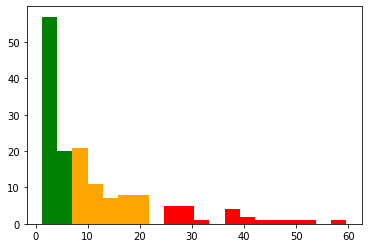

In [9]:
# histogram niedożywienia
undernourishment_brakpoints = {
    'low': 7.5,
    'medium': 25,
    'high': 100,
}

hist, bins = np.histogram(data['Undernourished'], bins=20)
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_widths = bins[1:] - bins[:-1]

low_mask = bin_centers <= undernourishment_brakpoints['low']
medium_mask = (bin_centers > undernourishment_brakpoints['low']) & (bin_centers <= undernourishment_brakpoints['medium'])
high_mask = bin_centers > undernourishment_brakpoints['medium']

plt.bar(bin_centers[low_mask], hist[low_mask], width=bin_widths[low_mask], color='green')
plt.bar(bin_centers[medium_mask], hist[medium_mask], width=bin_widths[medium_mask], color='orange')
plt.bar(bin_centers[high_mask], hist[high_mask], width=bin_widths[high_mask], color='red')
plt.show()

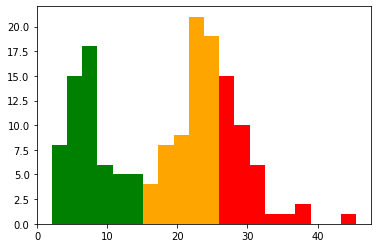

In [10]:
# histogram otyłości
obesity_brakpoints = {
    'low': 15,
    'medium': 25,
    'high': 100,
}

hist, bins = np.histogram(data['Obesity'], bins=20)
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_widths = bins[1:] - bins[:-1]

low_mask = bin_centers <= obesity_brakpoints['low']
medium_mask = (bin_centers > obesity_brakpoints['low']) & (bin_centers <= obesity_brakpoints['medium'])
high_mask = bin_centers > obesity_brakpoints['medium']

plt.bar(bin_centers[low_mask], hist[low_mask], width=bin_widths[low_mask], color='green')
plt.bar(bin_centers[medium_mask], hist[medium_mask], width=bin_widths[medium_mask], color='orange')
plt.bar(bin_centers[high_mask], hist[high_mask], width=bin_widths[high_mask], color='red')
plt.show()

In [11]:
# interaktywny niedożywienia
def divide_and_plot_under_nourishment(threshold):
    hist, bins = np.histogram(data['Undernourished'], bins=10)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    bin_widths = bins[1:] - bins[:-1]

    low_mask = bin_centers <= threshold
    high_mask = bin_centers > threshold
    
    plt.bar(bin_centers[low_mask], hist[low_mask], width=bin_widths[low_mask], color='green')
    plt.bar(bin_centers[high_mask], hist[high_mask], width=bin_widths[high_mask], color='gray')
    
    return data['Undernourished'] < threshold


def divide_and_plot_obesity(threshold):
    hist, bins = np.histogram(data['Obesity'], bins=10)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    bin_widths = bins[1:] - bins[:-1]

    low_mask = bin_centers <= threshold
    high_mask = bin_centers > threshold
    
    plt.bar(bin_centers[low_mask], hist[low_mask], width=bin_widths[low_mask], color='green')
    plt.bar(bin_centers[high_mask], hist[high_mask], width=bin_widths[high_mask], color='gray')
    
    return data['Obesity'] < threshold


def plot_covid_distribution_of_countries(visualized_countries_idx):
    confirmed = data[visualized_countries_idx]['Confirmed'].mean()
    recovered = data[visualized_countries_idx]['Recovered'].mean()
    deaths = data[visualized_countries_idx]['Deaths'].mean()
    
    plot_covid_distribution(confirmed, recovered, deaths)
    
def plot_covid_distribution(confirmed, recovered, deaths):
    plt.bar('Confirmed', confirmed, color='green')
    plt.bar('Recovered', recovered, color='blue')
    plt.bar('Deaths', deaths, color='red')
    plt.ylim(0, 5)


def plot_analized_population_percentage(visualized_countries_idx):
    total_population = data['Population'].sum()
    visualized_population = data[visualized_countries_idx]['Population'].sum()
    visualized_percentage = visualized_population / total_population * 100
    
    plt.bar('Population', visualized_percentage, color='green')
    plt.ylim(0, 100)
    

@interact(undernourishment_threshold=(10, 40, 1), obesity_threshold=(10, 40, 1))
def divide_and_plot(undernourishment_threshold = 25, obesity_threshold=25):
    plt.subplots(figsize=(18,8))
    
    plt.subplot(231)
    idx_below_undernourishment_threshold = divide_and_plot_under_nourishment(undernourishment_threshold)
    
    plt.subplot(232)
    idx_below_obesity_threshold = divide_and_plot_obesity(obesity_threshold)
    visualized_countries_idx = idx_below_undernourishment_threshold & idx_below_obesity_threshold
    
    plt.subplot(233)
    plot_analized_population_percentage(visualized_countries_idx)
    
    plt.subplot(212)
    plot_covid_distribution_of_countries(visualized_countries_idx)

    plt.show()

interactive(children=(IntSlider(value=25, description='undernourishment_threshold', max=40, min=10), IntSlider…

In [12]:
# na podstawie powyższego można zauważyć że w krajach
# o niższym poziomie niedożywienia i wyższym poziomie otyłości
# występuje więcej przypadków choroby
# 
# walidację powyższej tezy wykonano wyznaczjąc kowariancję

undernourishment_confirm_cov = np.cov(data['Undernourished'], data['Confirmed'])
obesity_confirm_cov = np.cov(data['Obesity'], data['Confirmed'])

print('''
Coviariance between 'Undernourished' and 'Confirmed' {}
Coviariance between 'Obesity' and 'Confirmed' {}
'''.format(undernourishment_confirm_cov[0,1], obesity_confirm_cov[0,1]))


Coviariance between 'Undernourished' and 'Confirmed' -13.687964863661097
Coviariance between 'Obesity' and 'Confirmed' 11.988555499264697



In [13]:
# wniosek: w krajach z większą otyłością i niższym niedożywieniem jest więcej przypadków covid

In [14]:
data.loc[:, 'Country':'Vegetables']

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Pulses,Spices,Starchy Roots,Stimulants,Sugar Crops,Sugar & Sweeteners,Treenuts,Vegetal Products,Vegetable Oils,Vegetables
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,0.5003,0.1001,0.3252,0.0750,0.0000,2.2261,0.1251,45.2476,2.3012,0.7504
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,0.8091,0.0000,1.2651,0.2501,0.0000,3.4422,0.3972,33.9070,2.8244,2.7508
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,1.0900,0.1195,1.9262,0.1493,0.0000,3.9869,0.2240,43.9749,5.7638,2.0457
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,1.4981,0.0000,12.6239,0.0441,0.0000,2.7539,0.0000,45.3184,4.2741,0.3525
4,Argentina,1.4354,14.9869,1.0650,0.0,16.7927,0.8643,0.2006,1.4663,9.4459,...,0.1235,0.0309,1.4045,0.2315,0.0000,7.0536,0.0463,34.9900,5.5410,0.8643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Venezuela (Bolivarian Republic of),0.8454,7.2303,0.6007,0.0,21.3126,0.2892,0.4449,2.3804,3.1368,...,0.7341,0.0000,1.3571,0.0667,0.0000,7.7864,0.0000,42.7586,7.5417,0.6674
150,Vietnam,0.7150,10.9806,0.9363,0.0,26.9833,0.2894,1.0385,1.8046,7.8311,...,0.4597,0.4256,0.7150,0.1021,0.1532,2.0940,0.3575,39.0364,1.3279,1.9578
151,Yemen,0.0000,3.4667,0.3394,0.0,32.0727,0.1455,0.1697,1.1879,2.0121,...,1.2121,0.0485,0.3152,0.1212,0.0000,7.0303,0.0242,46.5455,3.9515,0.3636
152,Zambia,1.1925,3.3043,0.3230,0.0,31.5528,0.1988,0.5714,0.2236,1.5155,...,0.2981,0.0745,4.0994,0.0248,0.0000,2.5590,0.0000,46.7081,3.0062,0.4472


In [15]:
categories = {
    'Fruits & Vegetables': ['Fruits - Excluding Wine', 'Vegetal Products', 'Vegetable Oils', 'Vegetables'],
    'All Animal Products': ['Animal Products', 'Animal fats', 'Aquatic Products, Other', 'Meat', 'Milk - Excluding Butter', 'Offals', 'Eggs', 'Fish, Seafood', 'Milk - Excluding Butter'],
    'Starches': ['Starchy Roots', 'Cereals - Excluding Beer', 'Pulses'],
    'Sugars': ['Sugar Crops', 'Sugar & Sweeteners'],
    'Substances': ['Alcoholic Beverages', 'Stimulants'],
    'Other': ['Miscellaneous', 'Oilcrops', 'Spices', 'Treenuts']
}

for new_column, aggregated_columns in categories.items():
    data[new_column] = data[aggregated_columns].sum(axis=1)

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

X, Y = data[categories.keys()].values, data[['Confirmed', 'Recovered', 'Deaths']].values

regressor = KNeighborsRegressor(n_neighbors=10)
model = MultiOutputRegressor(regressor).fit(X, Y)

In [17]:

@interact(
    fruits_and_vegetables=(0, 1.0),
    animal_products=(0.0, 1.0),
    starches=(0.0, 1.0),
    sugars=(0.0, 1.0),
    substances=(0.0, 1.0),
    other=(0.0, 1.0)
)
def plot_cases_by_diet(
    fruits_and_vegetables=0.5,
    animal_products=0.5,
    starches=0.5,
    sugars=0.5,
    substances=0.5,
    other=0.5
):
    # scale all values so that the add up to 100
    # (just like input data which is measured in percentages)
    weights_total = sum([fruits_and_vegetables, animal_products, starches, sugars, substances, other])
    fruits_and_vegetables = fruits_and_vegetables / weights_total * 100
    animal_products = animal_products / weights_total * 100
    starches = starches / weights_total * 100
    sugars = sugars / weights_total * 100
    substances = substances / weights_total * 100
    other = other / weights_total * 100
    
    model_input = [[
        fruits_and_vegetables,
        animal_products,
        starches,
        sugars,
        substances,
        other,
    ]]
    
    confirmed, recovered, deaths = model.predict(model_input).flatten()
    
    plot_covid_distribution(confirmed, recovered, deaths)
    

interactive(children=(FloatSlider(value=0.5, description='fruits_and_vegetables', max=1.0), FloatSlider(value=…

In [21]:
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

<AxesSubplot:>

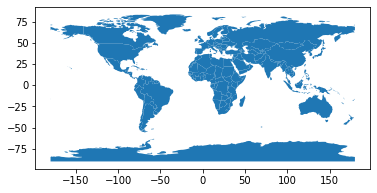

In [22]:
world.plot()